In [10]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import shapely.geometry as sg
from shapely.geometry import Point

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [25]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

In [8]:
dir_input = os.path.join(dir_base,'ITALY_ENSEMBLE_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')
DATA = xr.open_dataset(dir_input)

lon_CH = DATA['lon'].values
lat_CH = DATA['lat'].values
lon2d_CH, lat2d_CH = np.meshgrid(lon_CH, lat_CH)

CHIRPS_d = DATA['Mev_d'].values

In [9]:
dir_input = os.path.join(dir_base,'ITALY_ENSEMBLE_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_grid_IMERG.nc')
DATA = xr.open_dataset(dir_input)

lon_IM = DATA['lon'].values
lat_IM = DATA['lat'].values
lon2d_IM, lat2d_IM = np.meshgrid(lon_IM, lat_IM)

IMERG_d = DATA['Mev_d'].values

In [20]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))   
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


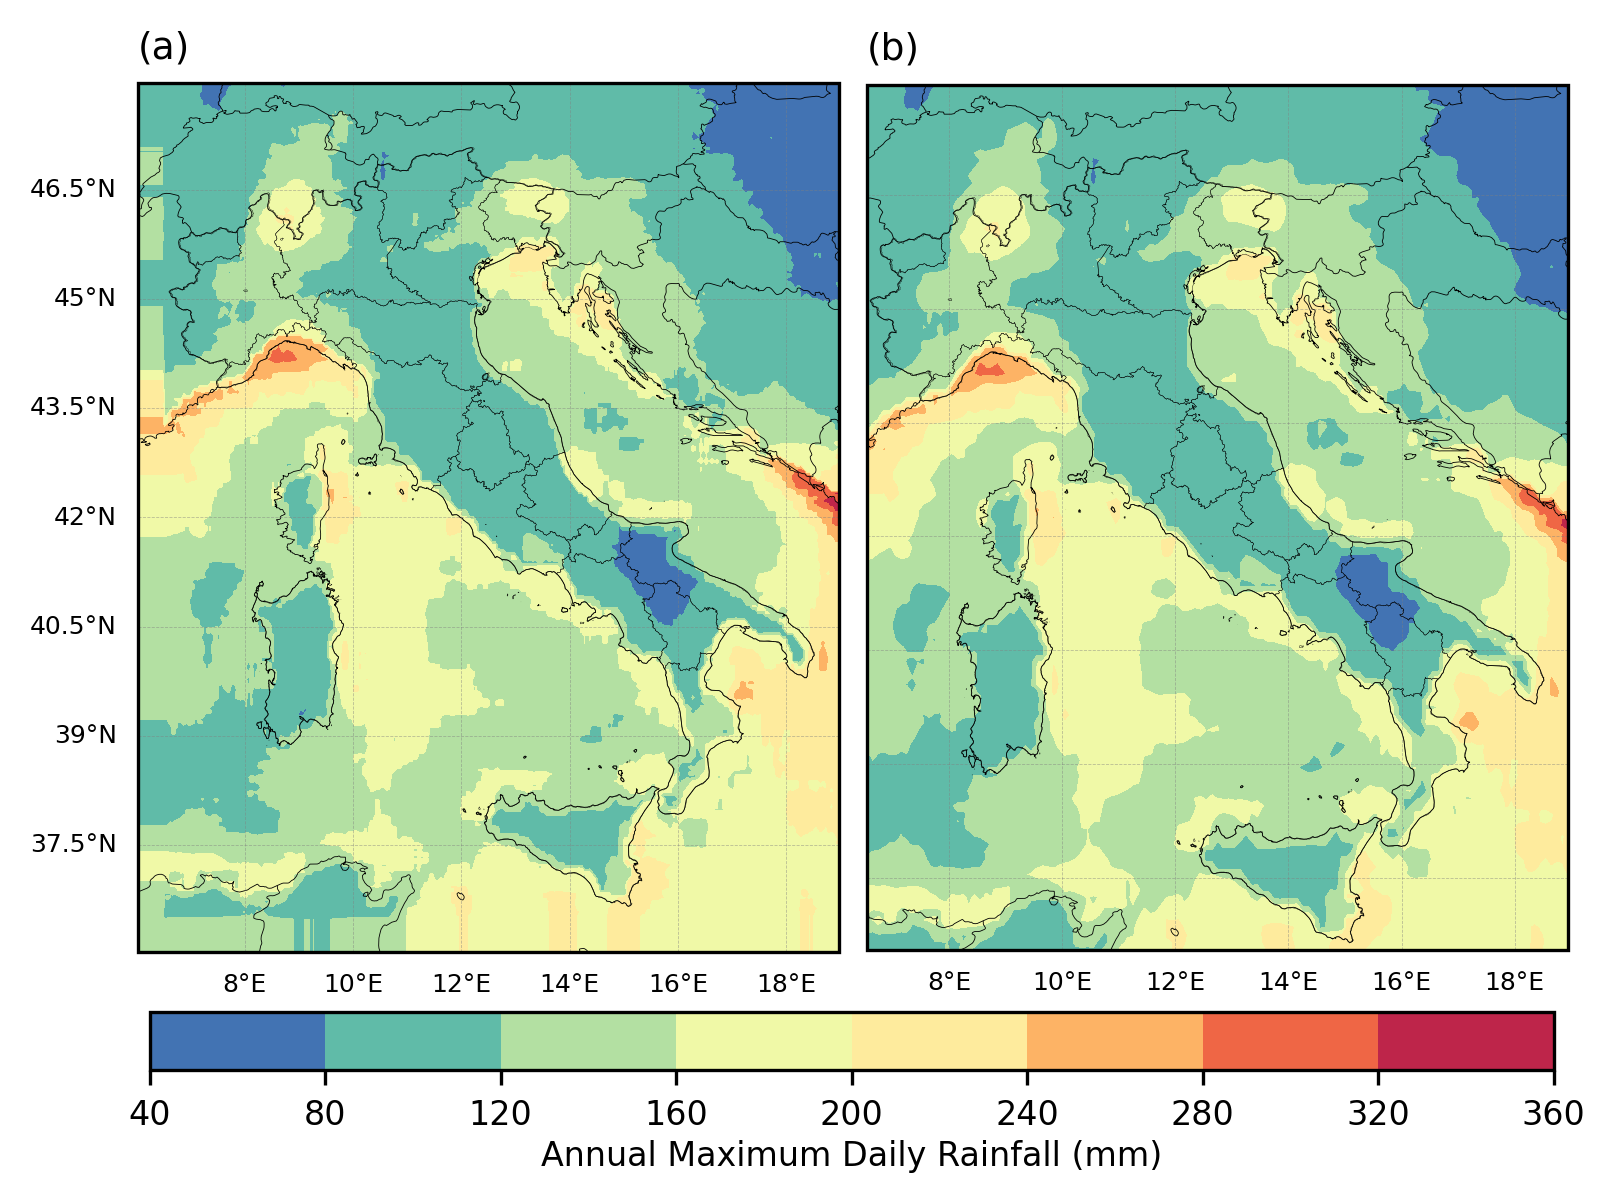

In [23]:
Mev_levels = np.arange(40, 400, 40)
# Diff_levels = np.arange(-80, 85, 5)
# Mev_levels = None

# Mev_levels = None
Mev_ticks = None
Diff_levels = np.arange(0,85,5)

Mev_cmap = plt.cm.Spectral_r
Mev_diff = plt.cm.coolwarm_r
Mev_diff = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2,color='k')
ax1.add_feature(cf.BORDERS,linewidth=0.2,color='black',zorder=4)
REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d_CH, lat2d_CH, CHIRPS_d[3,:,:], cmap=Mev_cmap, levels=Mev_levels)

ax1.set_title(f'(a)', fontsize=9, loc='left')
# ax1.set_title(f'Tr: 50 yrs', fontsize=8, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2,color='k')
ax1.add_feature(cf.BORDERS,linewidth=0.2,color='black',zorder=4)
REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d_IM, lat2d_IM, IMERG_d[3,:,:], cmap=Mev_cmap, levels=Mev_levels)#, extend='max'

ax1.set_title(f'(b)', fontsize=9, loc='left')
# ax1.set_title(f'ERA 5', fontsize=7, loc='right')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.04, hspace=0.01)

cbar_ax = fig.add_axes([0.055, 0.04, 0.585, 0.048])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal', ticks=Mev_ticks)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel("Annual Maximum Daily Rainfall (mm)", fontsize=8, labelpad=2)

# ============================================================================================================================
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

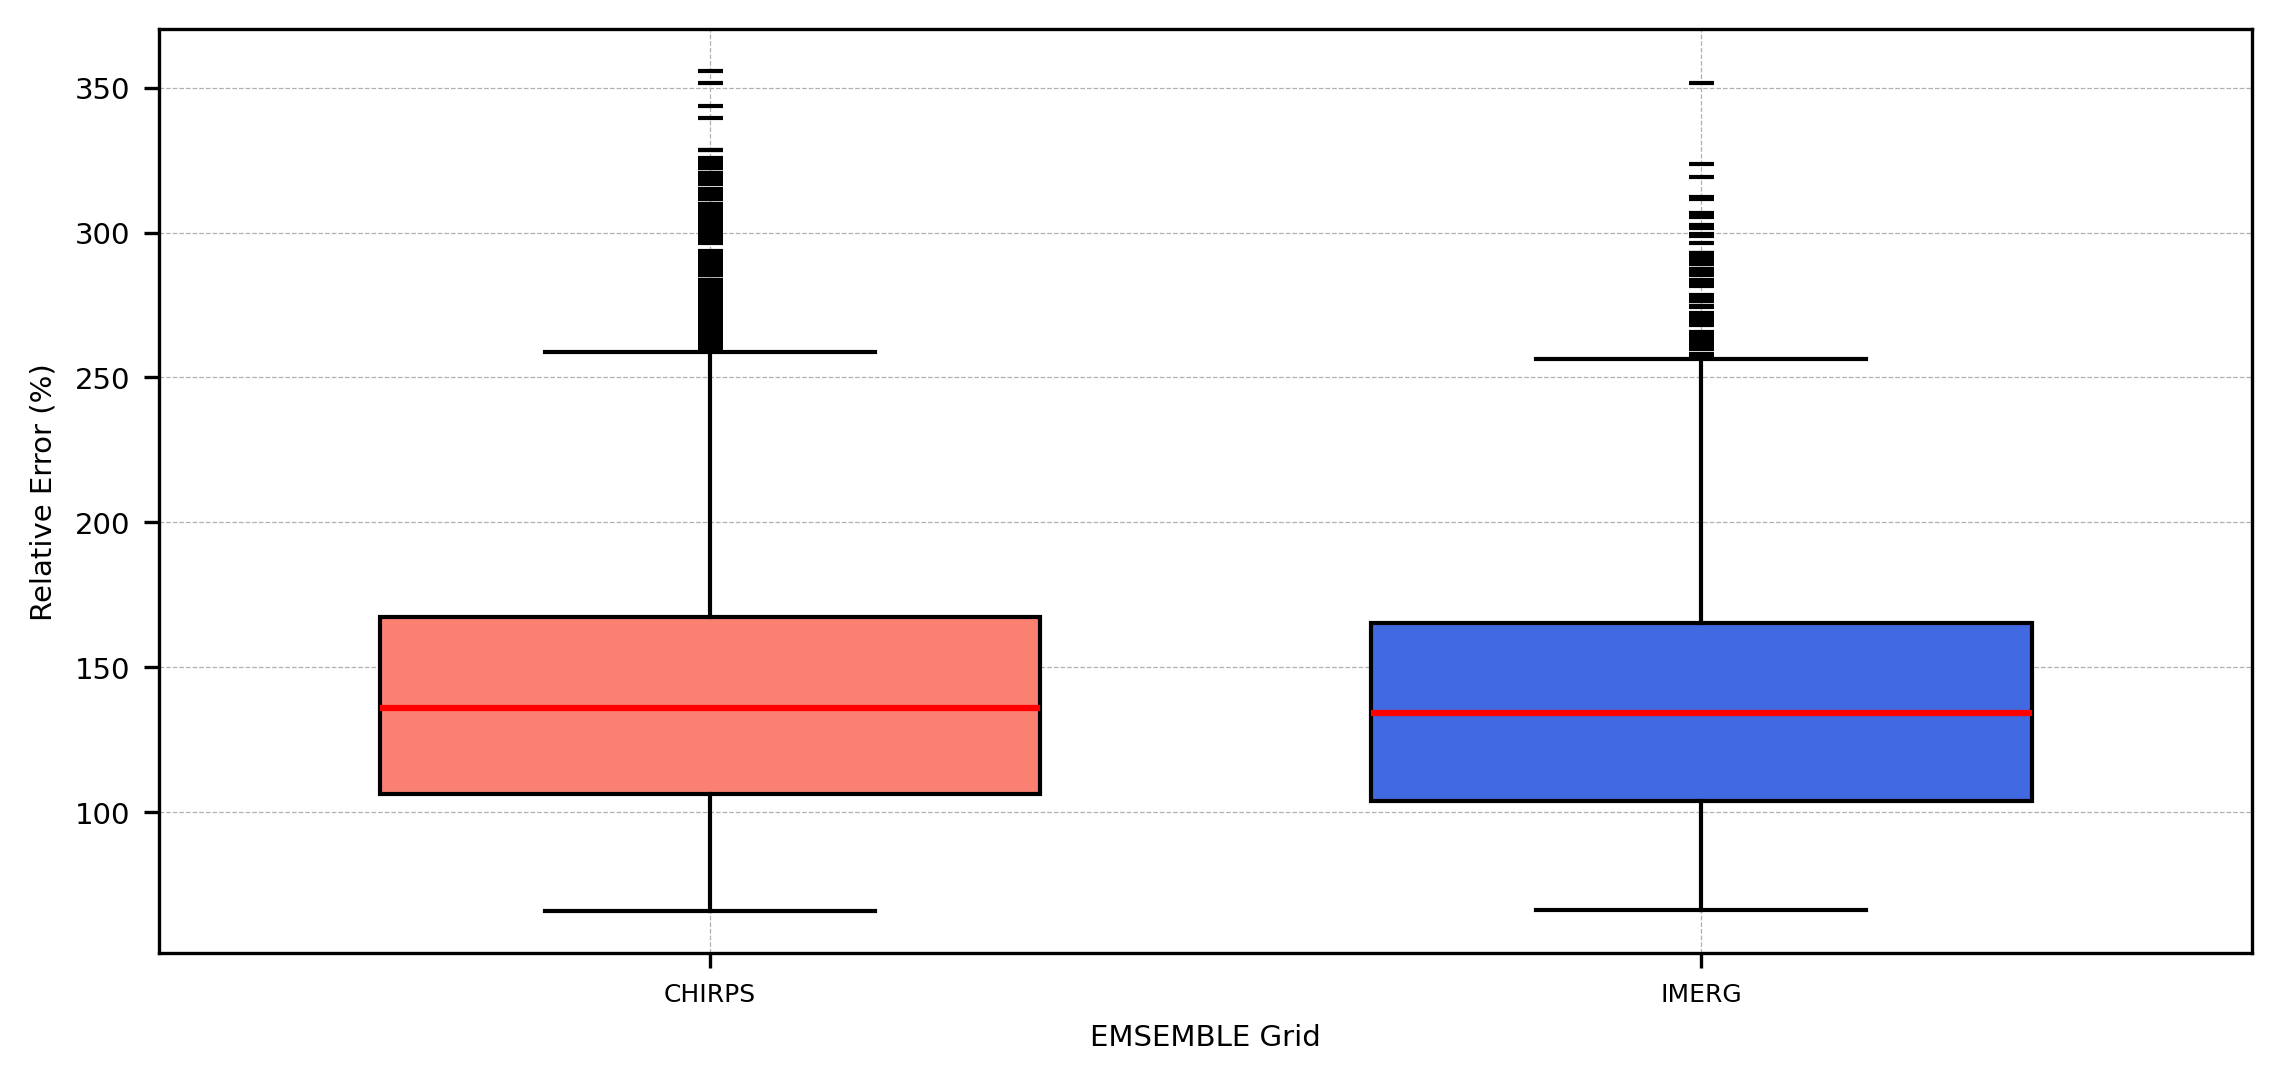

In [33]:
box_width = 0.6

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

CHIRPS_box = ax1.boxplot(CHIRPS_d[3,:,:].flatten(),positions=[0],
        widths=box_width,boxprops=SAT_boxprops,
        showmeans=False,meanline=True,meanprops=meanprops,
        medianprops=medianprops,
        showfliers=True,flierprops=flierprops,
        patch_artist=True,notch=False)

IMERG_box = ax1.boxplot(IMERG_d[3,:,:].flatten(),positions=[0.9],
        widths=box_width,boxprops=DOWN_boxprops,
        showmeans=False,meanline=True,meanprops=meanprops,
        medianprops=medianprops,
        showfliers=True,flierprops=flierprops,
        patch_artist=True,notch=False)

# ============================================================================================================================
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_xticks([0, 0.9])
ax1.set_xticklabels(['CHIRPS','IMERG'], fontsize=7)

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Relative Error (%)', fontsize=7)
ax1.set_xlabel('EMSEMBLE Grid', fontsize=7)
ax1.tick_params(axis='x', which='major', labelsize=6) 

In [34]:
CHIRPS_vals = CHIRPS_d[3,:,:].flatten()
CHIRPS_sorted_vals = np.sort(CHIRPS_vals)
CHIRPS_cdf = np.arange(1, len(CHIRPS_sorted_vals) + 1) / len(CHIRPS_sorted_vals)

IMERG_vals = IMERG_d[3,:,:].flatten()
IMERG_sorted_vals = np.sort(IMERG_vals)
IMERG_cdf = np.arange(1, len(IMERG_sorted_vals) + 1) / len(IMERG_sorted_vals)

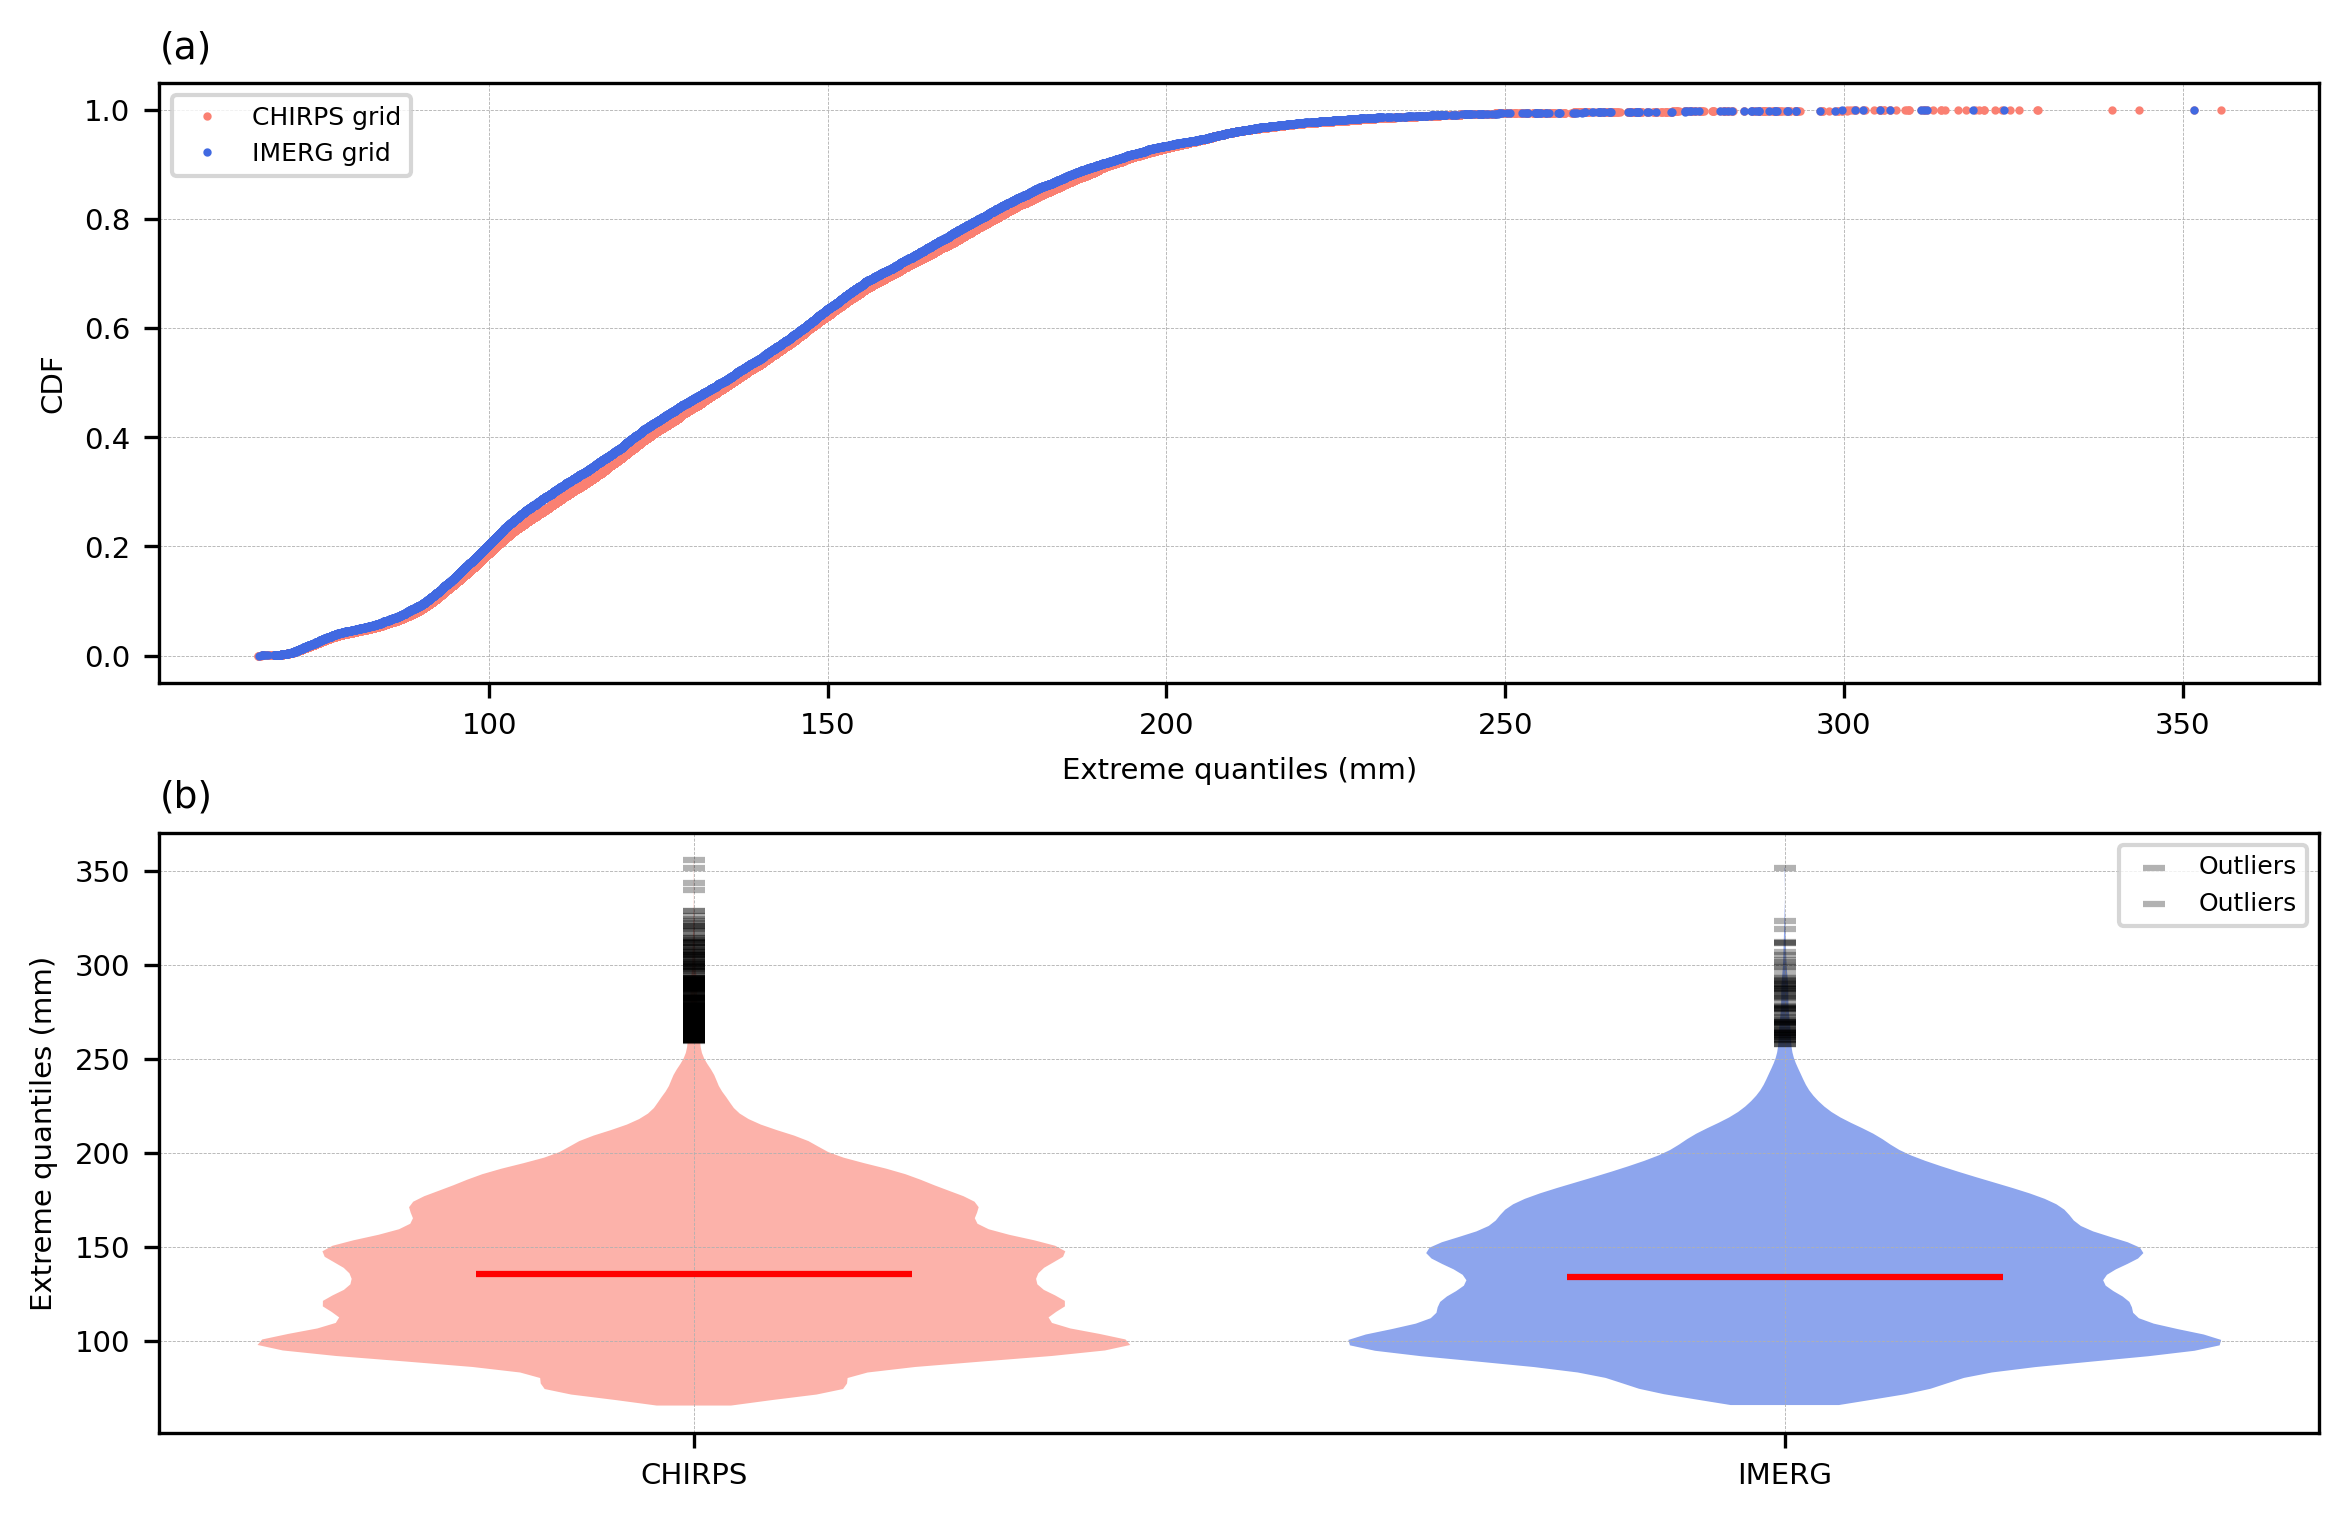

In [41]:
pos = 0

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,5),dpi=300)
gs = gridspec.GridSpec(2,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(CHIRPS_sorted_vals, CHIRPS_cdf, marker=".", linestyle="none", color='salmon', markersize=2, label='CHIRPS grid')
ax1.plot(IMERG_sorted_vals, IMERG_cdf, marker=".", linestyle="none", color='royalblue', markersize=2, label='IMERG grid')

ax1.set_xlabel("Extreme quantiles (mm)", fontsize=7)
ax1.set_ylabel("CDF", fontsize=7)
ax1.set_title(f'(a)', loc='left', fontsize=9)
ax1.grid(linestyle='--', linewidth=0.2)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.legend(fontsize=6)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0])
SAT_vio = ax1.violinplot(CHIRPS_vals, positions=[0], widths=0.4,
                        showmeans=False, showextrema=False, showmedians=True)
for b in SAT_vio['bodies']:
    b.set_facecolor('salmon')
    b.set_alpha(0.6)
SAT_vio['cmedians'].set_color("r")
# SAT_bodies.append(SAT_vio['bodies'][0])

Q1 = np.percentile(CHIRPS_vals, 25)
Q3 = np.percentile(CHIRPS_vals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_SAT = CHIRPS_vals[(CHIRPS_vals < lower_bound) | (CHIRPS_vals > upper_bound)]
ax1.scatter(np.repeat(0, len(outliers_SAT)), outliers_SAT, alpha=0.3,
            color="k", marker="_", s=30, zorder=20, label="Outliers" if pos==0 else "")

DOWN_vio = ax1.violinplot(IMERG_vals, positions=[0.5], widths=0.4,
                            showmeans=False, showextrema=False, showmedians=True)
for b in DOWN_vio['bodies']:
    b.set_facecolor('royalblue')
    b.set_alpha(0.6)
DOWN_vio['cmedians'].set_color("r")
# DOWN_bodies.append(DOWN_vio['bodies'][0])

Q1 = np.percentile(IMERG_vals, 25)
Q3 = np.percentile(IMERG_vals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_DOWN = IMERG_vals[(IMERG_vals < lower_bound) | (IMERG_vals > upper_bound)]
ax1.scatter(np.repeat(0.5, len(outliers_DOWN)), outliers_DOWN, alpha=0.3,
            color="k", marker="_", s=30, zorder=20, label="Outliers" if pos==0 else "")

ax1.set_ylabel("Extreme quantiles (mm)", fontsize=7)
ax1.set_title(f'(b)', loc='left', fontsize=9)
ax1.grid(linestyle='--', linewidth=0.2)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.legend(fontsize=6)
ax1.set_xticks([0,0.5])
ax1.set_xticklabels(['CHIRPS','IMERG'])

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.25)